# House Prices Regression

First import the preliminary modules that will be used in this project:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housePrices = pd.read_csv('housePrice.csv')

housePrices.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


### Data Cleaning

First we have to remove missing values.As we can see, `Address` column has 23 null values.

In [3]:
housePrices.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [3]:
housePrices.dropna(inplace = True)

Now we have to remove duplicate rows.

In [4]:
housePrices.drop_duplicates(inplace = True)

len(housePrices)

3248

All the independent variables should be numerical, in order to use for linear regression.So lets take a look at each column type:

In [16]:
housePrices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3248 entries, 0 to 3478
Data columns (total 8 columns):
Area          3248 non-null float64
Room          3248 non-null int64
Parking       3248 non-null bool
Warehouse     3248 non-null bool
Elevator      3248 non-null bool
Address       3248 non-null object
Price         3248 non-null float64
Price(USD)    3248 non-null float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 161.8+ KB


We can see that `Area` column has a string type(object).This should be coverted to int type.It also has characters like ',' that must be cleaned from it. 

In [5]:
housePrices['Area'] = housePrices['Area'].apply(lambda x: x.replace(',', ''))
housePrices['Area'] = housePrices['Area'].astype(float)

In [6]:
print(housePrices.dtypes)

Area          float64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object


In [6]:
housePrices.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70.0,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87.0,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59.0,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54.0,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71.0,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [7]:
housePrices.describe()

,Area,Room,Price,Price(USD)
count,3.248000e+03,3248.000000,3.248000e+03,3.248000e+03
mean,9.365872e+06,2.088054,5.478118e+09,1.826039e+05
std,3.277906e+08,0.764716,8.267916e+09,2.755972e+05
min,3.000000e+01,0.000000,3.600000e+06,1.200000e+02
25%,7.000000e+01,2.000000,1.420000e+09,4.733333e+04
50%,9.000000e+01,2.000000,2.977500e+09,9.925000e+04
75%,1.220000e+02,2.000000,6.200000e+09,2.066667e+05
max,1.616000e+10,5.000000,9.240000e+10,3.080000e+06


### Data Visualization

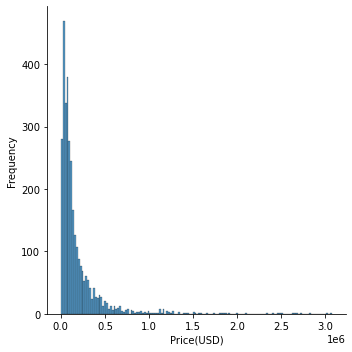

In [15]:
sns.displot(data= housePrices, x="Price(USD)");

plt.xlabel("Price(USD)")
plt.ylabel("Frequency")
plt.show()

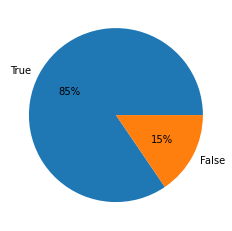

In [16]:
data = housePrices['Parking'].value_counts()
# plotting data on chart
plt.pie(data, labels=data.index, autopct='%.0f%%')
  
# displaying chart
plt.show()

We can see that 85% of the houses have the parking.

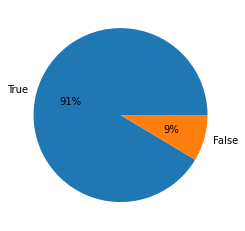

In [25]:
data = housePrices['Warehouse'].value_counts()
# plotting data on chart
plt.pie(data, labels=data.index, autopct='%.0f%%')
  
# displaying chart
plt.show()

91% of the houses have the warehouse.

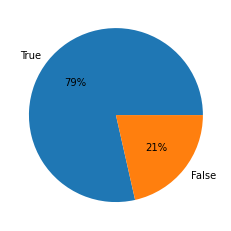

In [26]:
data = housePrices['Elevator'].value_counts()
# plotting data on chart
plt.pie(data, labels=data.index, autopct='%.0f%%')
  
# displaying chart
plt.show()

79% of the houses have the elevator.

c:\users\ihc\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


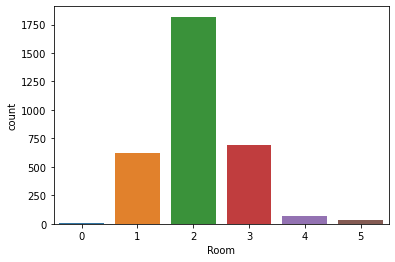

In [9]:
sns.countplot(housePrices['Room'])  

plt.show()

The majority of the houses in the dataset have 2 rooms.

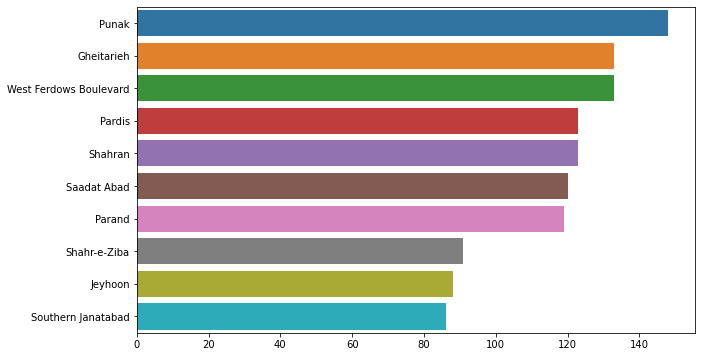

In [69]:
data = housePrices['Address'].value_counts().head(10) 

plt.figure(figsize=(10,6))

sns.barplot(x=data.values, y=data.index)

plt.show()

Punak has the highest number of houses in the dataset with 140 house.

### Removing Outliers

Now I plot the boxplot for Area variable.We can see from boxplot that values larger than 200 are outliers.Although houses with area of 1.616000e+10(our max value in dataset) is very rare but houses with area under 500 square meters is common.So I chose houses with area under 500 square meters for my analysis.

<ipython-input-10-28692ae39f45>:5: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  plt.axis([0,0,0,500])


(-0.05, 0.05, 0.0, 500.0)

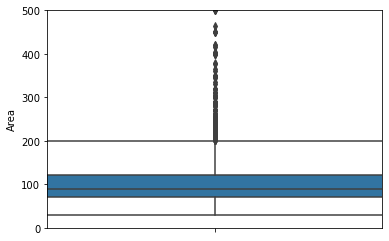

In [10]:
#sns.boxplot(data = housePrices, x = 'Area', y=housePrices['Area'].value_counts())
sns.boxplot(y=housePrices["Area"])

#zoom in
plt.axis([0,0,0,500])

In [11]:
housePrices = housePrices[housePrices['Area'] < 500]

len(housePrices)

3221

### Categorical Encoding

A machine can only understand the numbers. It cannot understand the text.So we have to convert categorical columns to numerical columns so that a machine learning algorithm understands it.There are two approaches for this:
- Label Encoding
- One-Hot Encoding

I use both of them in my project.

First we have to import necessary modules that we need for regression and standardization:

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

#### One-Hot Encoding

In this encoding technique, each category is represented as a one-hot vector.We apply One-Hot Encoding when:

- The categorical feature is not ordinal (like the address variable)
- The number of categorical features is less so one-hot encoding can be effectively applied

In [14]:
ohe = pd.get_dummies(data=housePrices, columns =['Address'], drop_first=True)

print(housePrices.Address.nunique())
print()

#for col in ohe.columns:
#    print(col)

190



In [15]:
ohe

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Address_Abbasabad,Address_Absard,Address_Abuzar,...,Address_Waterfall,Address_West Ferdows Boulevard,Address_West Pars,Address_Yaftabad,Address_Yakhchiabad,Address_Yousef Abad,Address_Zafar,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht
0,63.0,1,True,True,True,1.850000e+09,61666.67,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60.0,1,True,True,True,1.850000e+09,61666.67,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79.0,2,True,True,True,5.500000e+08,18333.33,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,95.0,2,True,True,True,9.025000e+08,30083.33,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123.0,2,True,True,True,7.000000e+09,233333.33,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,63.0,1,True,True,False,1.890000e+09,63000.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3474,86.0,2,True,True,True,3.500000e+09,116666.67,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3475,83.0,2,True,True,True,6.800000e+09,226666.67,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3477,105.0,2,True,True,True,5.600000e+09,186666.67,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Scaler = StandardScaler() MinMaxScaler()
X  = ohe.drop(['Price', 'Price(USD)'], axis = 1)

Scaler = MinMaxScaler()
X_Scaled  = Scaler.fit_transform(X)
y = ohe['Price(USD)']

X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.3, random_state = 56)

mlr = LinearRegression()
mlr.fit(X_train, y_train)

# make predictions
yhat = mlr.predict(X_test)

# evaluate predictions
acc = r2_score(y_test, yhat)
#acc = mlr.score(X_test, y_test)
print('Accuracy: %.3f' % acc)

mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

Accuracy: -4087252074879236911923200.000
MAE: 44750202951765784.000


We get negative R2 value.R2 is negative only when the chosen model does not follow the trend of the data.This tells us that our model need to be revised.Since Address feature has 190 different categories, When we convert it to dummy variables, we will have 196 features that cause our model to overfit.So I remove the Address from my feature set.

In [24]:
X  = ohe[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']]
Scaler = MinMaxScaler()
X_Scaled  = Scaler.fit_transform(X)
y = ohe['Price(USD)']

#5
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.3, random_state = 56)

mlr = LinearRegression()
mlr.fit(X_train, y_train)

# make predictions
yhat = mlr.predict(X_test)

# evaluate predictions
acc = r2_score(y_test, yhat)
#acc = mlr.score(X_test, y_test)
print('Accuracy: %.3f' % acc)

mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

Accuracy: 0.670
MAE: 80595.713


This time our accuracy increases significantly and we get 67% R2 score.

#### Label Encoding

In this technique, each label is assigned a unique integer based on alphabetical ordering.We apply Label Encoding when:

- The categorical feature is ordinal
- The number of categories is quite large as one-hot encoding can lead to high memory consumption

In [21]:
from sklearn.preprocessing import LabelEncoder
df = housePrices.copy()
le = LabelEncoder()
df['Address_LE'] = le.fit_transform(df['Address'])

df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Address_LE
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67,155
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67,155
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33,116
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33,151
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33,149
...,...,...,...,...,...,...,...,...,...
3473,63.0,1,True,True,False,Feiz Garden,1.890000e+09,63000.00,52
3474,86.0,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67,162
3475,83.0,2,True,True,True,Niavaran,6.800000e+09,226666.67,104
3477,105.0,2,True,True,True,Dorous,5.600000e+09,186666.67,39


In [33]:
#Scaler = StandardScaler() MinMaxScaler()

X  = df.drop(['Price', 'Price(USD)','Address'], axis = 1)

Scaler = MinMaxScaler()
X_Scaled  = Scaler.fit_transform(X)

y = df['Price(USD)']

X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.2, random_state = 38)

mlr2 = LinearRegression()
mlr2.fit(X_train, y_train)

# make predictions
yhat = mlr2.predict(X_test)

# evaluate predictions
acc = r2_score(y_test, yhat)
#acc = mlr2.score(X_test, y_test)
print('Accuracy: %.3f' % acc)

mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

Accuracy: 0.682
MAE: 78266.701


We can see that by using label encoder for encoding Address variable we get better results.This time we get 68.2% R2-score.

In [36]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

X  = df.drop(['Price', 'Price(USD)', 'Address'], axis = 1)
y = df['Price(USD)']

Scaler = MinMaxScaler()
X_Scaled  = Scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.2, random_state = 38)


poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
  
poly.fit(X_train_poly, y_train)
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

X_test_poly = poly.fit_transform(X_test)
yhat = lin_reg.predict(X_test_poly)

# evaluate predictions
acc = r2_score(y_test, yhat)
#acc = mlr2.score(X_test, y_test)
print('Accuracy: %.3f' % acc)

mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

#print(lin_reg.coef_)

Accuracy: 0.743
MAE: 72278.789


Using Polynomial Regression gives us a good accuracy of 74.3%.

### Reducing number of Features

In order to make our model less complicated, we can plot a scatterplot for each pair of our features to find multicolinearity and remove those features that are correlated with other features. We can observe from pairplot that `Area` and `Room` have a good correlation with our target variable(Price).

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


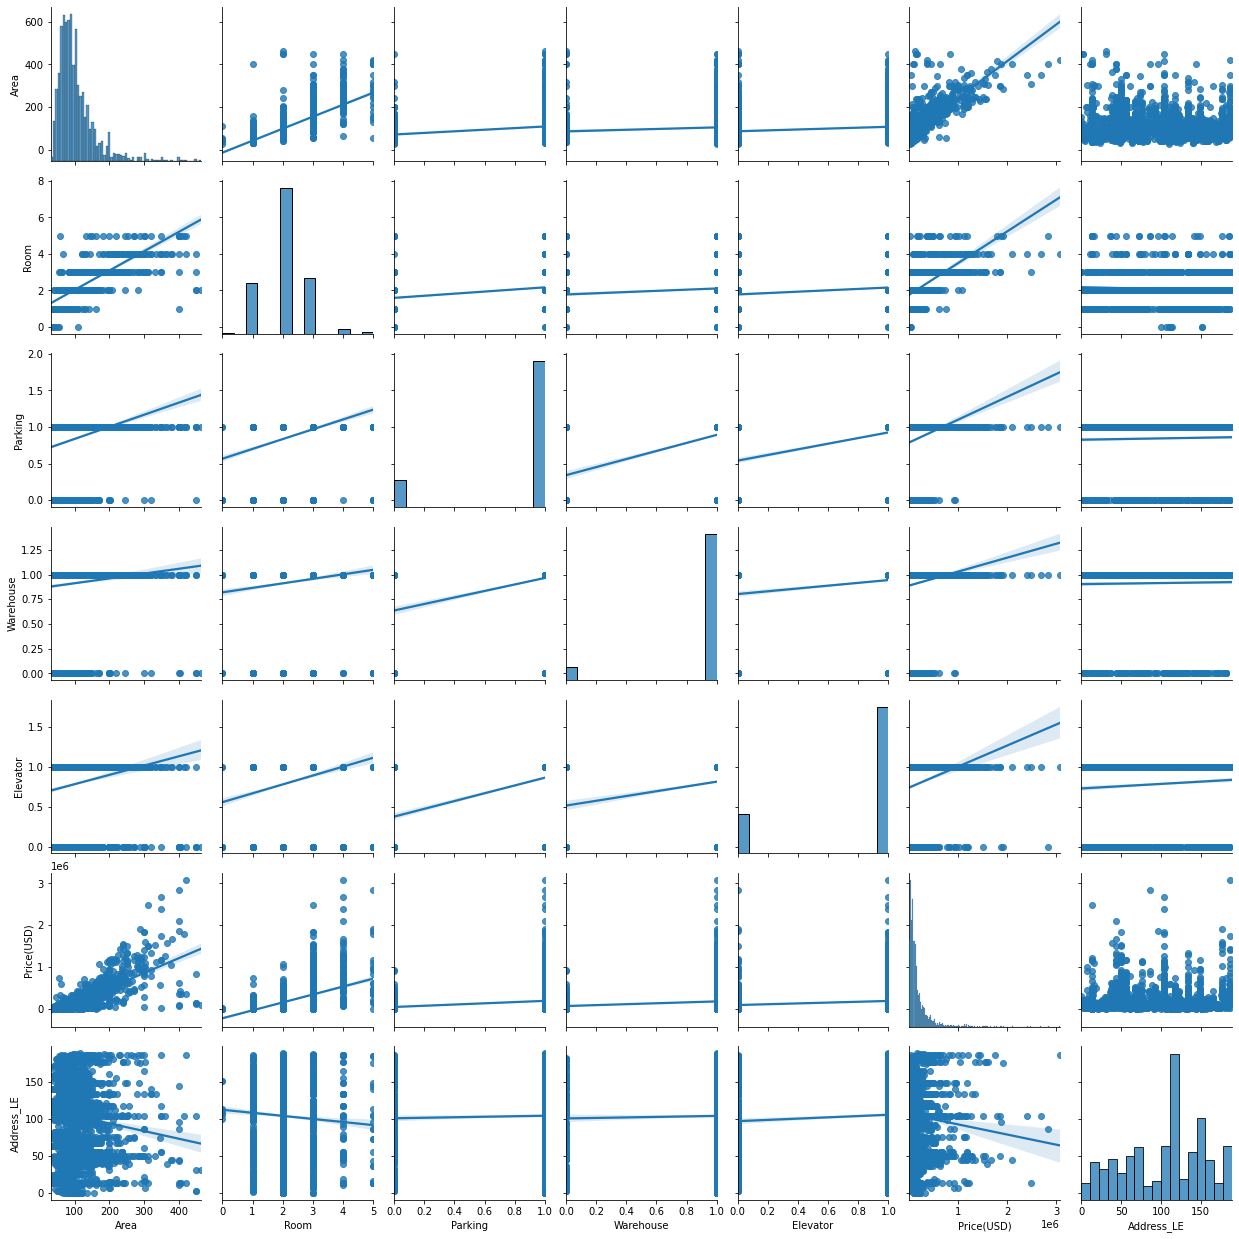

In [42]:
df_LE = df.drop(['Price','Address'], axis = 1)
sns.pairplot(df_LE, kind='reg')
# to show
plt.show()

In [43]:
df_LE.corr()

,Area,Room,Parking,Warehouse,Elevator,Price(USD),Address_LE
Area,1.000000,0.770037,0.248887,0.095135,0.156255,0.775416,-0.112743
Room,0.770037,1.000000,0.278214,0.122427,0.205633,0.572257,-0.062140
Parking,0.248887,0.278214,1.000000,0.426233,0.434816,0.213381,0.024944
Warehouse,0.095135,0.122427,0.426233,1.000000,0.206523,0.124687,0.019159
Elevator,0.156255,0.205633,0.434816,0.206523,1.000000,0.160343,0.070457
Price(USD),0.775416,0.572257,0.213381,0.124687,0.160343,1.000000,-0.067643
Address_LE,-0.112743,-0.062140,0.024944,0.019159,0.070457,-0.067643,1.000000


Now lets plot the heatmap of correlation matrix. We can see that `Area` and `Room` have a high correlation with `Price(USD)`.Since `Area` and `Room` also have a high correlation with eachother(0.77), we can drop one of them and keep the other. We keep `Area` because it has a higher correlation with target(0.78). `Parking`, `Warehouse`, `Elevator`, `Price(USD)` and `Address_LE` have a weak correlation with `Price(USD)` and we can drop them too.

<AxesSubplot:>

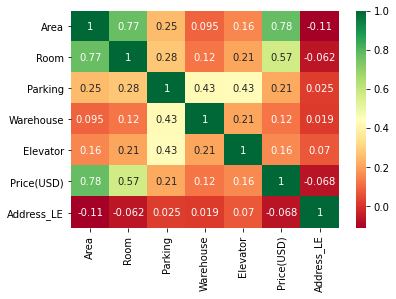

In [44]:
sns.heatmap(df_LE.corr(), annot=True,cmap='RdYlGn')

In [50]:
X  = df['Area'].values.reshape(-1, 1)

Scaler = MinMaxScaler()
X_Scaled  = Scaler.fit_transform(X)

y = df['Price(USD)']

X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.2, random_state = 38)

mlr3 = LinearRegression()
mlr3.fit(X_train, y_train)

# make predictions
yhat = mlr3.predict(X_test)

# evaluate predictions
acc = r2_score(y_test, yhat)
#acc = mlr2.score(X_test, y_test)
print('Accuracy: %.3f' % acc)

mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

Accuracy: 0.679
MAE: 78930.933


In [66]:
print(f"Our Regression line's Slope is:{mlr3.coef_[0]}")
print(f"Our intercept is:{mlr3.intercept_}")

Our Regression line's Slope is:1459168.8212729213
Our intercept is:-74216.71527566409


You can see our data and regression line in the chart below.

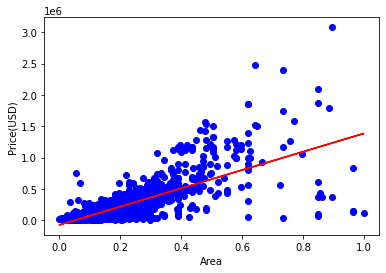

In [67]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, mlr3.coef_[0]*X_train + mlr3.intercept_, '-r')
plt.xlabel("Area")
plt.ylabel("Price(USD)")
plt.show()